# Assignment # 3
Citation: https://github.com/mayank408/TFIDF/blob/master/TFIDF.ipynb

In [167]:
# Import findspark 
import findspark

# Or use this alternative
findspark.init()

In [168]:
# Import SparkSession
from pyspark.sql import SparkSession

# Build the SparkSession
spark = SparkSession.builder \
   .master("local") \
   .appName("Spark_ML_Assignment_3") \
   .config("spark.executor.memory", "1gb") \
   .getOrCreate()
   
sc = spark.sparkContext
#sc.stop()

In [169]:
#Import Libraries 

from pyspark.mllib.feature import HashingTF

from pyspark.mllib.feature import IDF

#Answer for Part 2 (a) and (b)

Bag-of-words is conceptually simple approach to text analysis. Here we treat each document as unordered collection of words. We will construct some components for bag-of-words analysis on description field of datasets.

 (a) Implement a function that takes a string and returns non-empty tokens by splitting using regular expressions.

(b) Stopwords are common (English) words that do not contribute much to the content or meaning of a document (e.g., "the", "a", "is", "to", etc.). Stopwords add noise to bag-of-words comparisons, so they are usually excluded. Using the included file "stopwords.txt", implement a function, an improved tokenizer that does not emit stopwords.

In [170]:
import re
def strip_words(text):
    lowerText = text.lower()
    split = re.findall("[a-zA-Z]+", lowerText)
    return split

In [171]:
with open('stopwords.txt', 'r') as f:
     stop_words = f.read().splitlines()

In [172]:
def stop_words_strip(clean_words):
    list_stop_stripped = []
    for i in clean_words:
        #print (i)
        if i not in stop_words:
            list_stop_stripped.append(i)
    return list_stop_stripped

Answer for Part 1
Read each file and create RDD consisting of lines. First column of Google.csv is  URLs and first column of Amazon.csv is alphanumeric strings. We call them ID to simplify and want to parse ID for each row. Load the data into RDD so that ID is the key and other information are included in value.

In [173]:
google = spark.read.csv("C:\\Users\\sures\\Downloads\\Google.csv", header=True)

In [174]:
google_pairs = google.rdd.map(lambda x: (x[0], x[1:]))

In [240]:
google_pairs.collect()

[('http://www.google.com/base/feeds/snippets/11125907881740407428',
  ('learning quickbooks 2007', 'learning quickbooks 2007', 'intuit', '38.99')),
 ('http://www.google.com/base/feeds/snippets/11538923464407758599',
  ('superstart! fun with reading & writing!',
   'fun with reading & writing! is designed to help kids learn to read and write better through exercises puzzle-solving creative writing decoding and more!',
   None,
   '8.49')),
 ('http://www.google.com/base/feeds/snippets/11343515411965421256',
  ('qb pos 6.0 basic software',
   'qb pos 6.0 basic retail mngmt software. for retailers who need basic inventory sales and customer tracking.',
   'intuit',
   '637.99')),
 ('http://www.google.com/base/feeds/snippets/12049235575237146821',
  ('math missions: the amazing arcade adventure (grades 3-5)',
   "save spectacle city by disrupting randall underling's plan to drive all the stores out of business and take over the city. solve real-world math challenges in the uniquely entertai

In [176]:
google_description = google_pairs.map(lambda x: (x[1])).collect()

In [177]:
google_description_list = []

for item in google_description:
    sub_item = item[1]
    google_description_list.append(sub_item)

In [178]:
google_description_list_stripped = []
for elements in google_description_list:
    stripped_words_google = strip_words(elements)
    google_description_list_stripped.append(stripped_words_google)
    #print (stripped_words_google)

In [227]:
#print(google_description_list_stripped)

In [180]:
flat_list_google = [item for sublist in google_description_list_stripped for item in sublist]
#print(flat_list_google)

In [228]:
google_list_stop_stripped = stop_words_strip(flat_list_google)
#print(google_list_stop_stripped)

In [182]:
amazon = spark.read.csv("C:\\Users\\sures\\Downloads\\Amazon.csv", header=True)

In [183]:
#amazon_pairs = amazon.rdd.map(lambda x: (x[0], x[2]))
amazon_pairs = amazon.rdd.map(lambda x: (x[0], x[1:]))

In [241]:
amazon_pairs.collect()

[('b000g80lqo',
  ('peachtree by sage premium accounting for nonprofits 2007',
   "peachtree premium accounting for nonprofits 2007 is the affordable easy to use accounting solution that provides you with donor/grantor management. if you're like most nonprofit organizations you're constantly striving to maximize each and every dollar of your annual operating budget. financial reporting by programs and funds advanced operational reporting and the rock-solid core accounting features that have made peachtree the choice of hundreds of thousands of small businesses. the result is an accounting solution tailor-made for the challenges of operating a nonprofit organization. keep an audit trail to record and report on any changes made to your transactions improve data integrity with prior period locking archive your organization's data for snap shots of your data before you closed your year set up individual user profiles with password protection peachtree restore wizard restores all backed-up 

In [184]:
amazon_description = amazon_pairs.map(lambda x: (x[1])).collect()

In [185]:
amazon_description_list = []

for item in amazon_description:
    sub_item = item[1]
    amazon_description_list.append(sub_item)
#print(amazon_description_list)

In [186]:
amazon_description_list_stripped = []
for elements in amazon_description_list:
    stripped_words_amazon = strip_words(elements)
    amazon_description_list_stripped.append(stripped_words_amazon)
    #print (stripped_words_google)

In [187]:
#print(amazon_description_list_stripped)

In [188]:
flat_list_amazon = [item for sublist in amazon_description_list_stripped for item in sublist]
#print(flat_list_amazon)

In [189]:
amazon_list_stop_stripped = stop_words_strip(flat_list_amazon)
#print(amazon_list_stop_stripped)

Answer for Part 4
Combine the datasets to create a corpus. Each element of the corpus is a <key, value> pair where key is ID and value is associated tokens from two datasets combined.

In [114]:
corpus = set(google_list_stop_stripped).union(set(amazon_list_stop_stripped))

In [120]:
wordDictA = dict.fromkeys(corpus, 0) 
wordDictB = dict.fromkeys(corpus, 0)

Answer for Part 3
Write a function that takes a list of tokens and returns a dictionary mapping tokens to term frequency.

In [121]:
for word in google_list_stop_stripped:
    wordDictA[word]+=1
    
for word in amazon_list_stop_stripped:
    wordDictB[word]+=1

In [ ]:
Answer to Part 2 (c) & Part 4

Tokenize both Amazon and Google datasets. Here for each instance, tokenize the values corresponding to the descriptions.

In [122]:
# Google dataset "desription" tokenized
wordDictA

{'pushes': 1,
 'scooby': 2,
 'roy': 3,
 'optimum': 1,
 'batteries': 0,
 'articles': 2,
 'computerf': 0,
 'sloops': 1,
 'crayons': 0,
 'mind': 16,
 'dxi': 1,
 'bells': 0,
 'cruise': 0,
 'takeout': 0,
 'routines': 0,
 'sticks': 0,
 'gd': 1,
 'fea': 1,
 'porter': 0,
 'turnit': 1,
 'dagobah': 0,
 'professionally': 11,
 'sided': 0,
 'editorially': 0,
 'scratching': 1,
 'follow': 14,
 'bowling': 2,
 'degrees': 0,
 'summarize': 1,
 'provides': 120,
 'mla': 0,
 'redraws': 0,
 'figure': 4,
 'auxiliary': 0,
 'hijackers': 1,
 'diagramming': 0,
 'outshines': 0,
 'duo': 13,
 'dietary': 0,
 'platinumverb': 0,
 'invention': 1,
 'conflict': 1,
 'strikes': 0,
 'composing': 6,
 'moment': 1,
 'hobby': 2,
 'several': 24,
 'cutaway': 0,
 'abe': 1,
 'kbps': 0,
 'familytroubleshoot': 0,
 'keychain': 0,
 'santana': 1,
 'shattered': 0,
 'koo': 0,
 'mat': 1,
 'contentbarrier': 0,
 'velocity': 1,
 'hero': 13,
 'fleet': 6,
 'virtualtrak': 0,
 'putting': 3,
 'fifa': 2,
 'exploding': 0,
 'cities': 2,
 'omaha': 0,
 

In [242]:
# Amazon dataset "description" tokenized
wordDictB

{'pushes': 0,
 'scooby': 2,
 'roy': 0,
 'optimum': 1,
 'batteries': 1,
 'articles': 21,
 'computerf': 1,
 'sloops': 0,
 'crayons': 2,
 'mind': 31,
 'dxi': 0,
 'bells': 1,
 'cruise': 2,
 'takeout': 1,
 'routines': 2,
 'sticks': 2,
 'gd': 0,
 'fea': 0,
 'porter': 2,
 'turnit': 0,
 'dagobah': 1,
 'professionally': 24,
 'sided': 2,
 'editorially': 1,
 'scratching': 0,
 'follow': 34,
 'bowling': 1,
 'degrees': 5,
 'summarize': 2,
 'provides': 195,
 'mla': 1,
 'redraws': 1,
 'figure': 7,
 'auxiliary': 2,
 'hijackers': 1,
 'diagramming': 4,
 'outshines': 1,
 'duo': 4,
 'dietary': 2,
 'platinumverb': 2,
 'invention': 1,
 'conflict': 5,
 'strikes': 1,
 'composing': 14,
 'moment': 5,
 'hobby': 0,
 'several': 34,
 'cutaway': 1,
 'abe': 0,
 'kbps': 2,
 'familytroubleshoot': 1,
 'keychain': 1,
 'santana': 0,
 'shattered': 1,
 'koo': 1,
 'mat': 0,
 'contentbarrier': 2,
 'velocity': 2,
 'hero': 11,
 'fleet': 3,
 'virtualtrak': 1,
 'putting': 6,
 'fifa': 0,
 'exploding': 3,
 'cities': 5,
 'omaha': 1,


In [123]:
# Tokens as dataframe
import pandas as pd
pd.DataFrame([wordDictA, wordDictB])

,aa,aac,aaf,aang,aba,abacus,abandoned,abbreviated,abbyy,abc,...,zoom,zoombinis,zoomed,zoomify,zooming,zoomingcheck,zooms,zoopedia,zoos,zune
0,6,0,0,1,2,4,1,0,1,2,...,2,1,1,0,0,0,1,0,0,0
1,0,10,13,0,0,1,0,1,0,1,...,33,1,0,20,3,1,4,1,1,2


Answer to Part 6
Write a function which does the following on entire corpus:

(a) Calculate token frequencies for tokens

In [214]:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

In [215]:
tf_google = computeTF(wordDictA, google_list_stop_stripped)
tf_amazon = computeTF(wordDictB, amazon_list_stop_stripped)

In [216]:
# token frequency for google
tf_google

{'pushes': 1.4762762408101804e-05,
 'scooby': 2.9525524816203607e-05,
 'roy': 4.428828722430541e-05,
 'optimum': 1.4762762408101804e-05,
 'batteries': 0.0,
 'articles': 2.9525524816203607e-05,
 'computerf': 0.0,
 'sloops': 1.4762762408101804e-05,
 'crayons': 0.0,
 'mind': 0.00023620419852962886,
 'dxi': 1.4762762408101804e-05,
 'bells': 0.0,
 'cruise': 0.0,
 'takeout': 0.0,
 'routines': 0.0,
 'sticks': 0.0,
 'gd': 1.4762762408101804e-05,
 'fea': 1.4762762408101804e-05,
 'porter': 0.0,
 'turnit': 1.4762762408101804e-05,
 'dagobah': 0.0,
 'professionally': 0.00016239038648911984,
 'sided': 0.0,
 'editorially': 0.0,
 'scratching': 1.4762762408101804e-05,
 'follow': 0.00020667867371342526,
 'bowling': 2.9525524816203607e-05,
 'degrees': 0.0,
 'summarize': 1.4762762408101804e-05,
 'provides': 0.0017715314889722165,
 'mla': 0.0,
 'redraws': 0.0,
 'figure': 5.9051049632407214e-05,
 'auxiliary': 0.0,
 'hijackers': 1.4762762408101804e-05,
 'diagramming': 0.0,
 'outshines': 0.0,
 'duo': 0.000191

In [217]:
# token frequency for amazon
tf_amazon

{'pushes': 0.0,
 'scooby': 1.0813207251336782e-05,
 'roy': 0.0,
 'optimum': 5.406603625668391e-06,
 'batteries': 5.406603625668391e-06,
 'articles': 0.00011353867613903622,
 'computerf': 5.406603625668391e-06,
 'sloops': 0.0,
 'crayons': 1.0813207251336782e-05,
 'mind': 0.00016760471239572012,
 'dxi': 0.0,
 'bells': 5.406603625668391e-06,
 'cruise': 1.0813207251336782e-05,
 'takeout': 5.406603625668391e-06,
 'routines': 1.0813207251336782e-05,
 'sticks': 1.0813207251336782e-05,
 'gd': 0.0,
 'fea': 0.0,
 'porter': 1.0813207251336782e-05,
 'turnit': 0.0,
 'dagobah': 5.406603625668391e-06,
 'professionally': 0.0001297584870160414,
 'sided': 1.0813207251336782e-05,
 'editorially': 5.406603625668391e-06,
 'scratching': 0.0,
 'follow': 0.0001838245232727253,
 'bowling': 5.406603625668391e-06,
 'degrees': 2.7033018128341957e-05,
 'summarize': 1.0813207251336782e-05,
 'provides': 0.0010542877070053363,
 'mla': 5.406603625668391e-06,
 'redraws': 5.406603625668391e-06,
 'figure': 3.7846225379678

Answer for Part 5
Write an IDF function that return a pair RDD where key is each unique token and value is corresponding IDF value. Plot a histogram of IDF values. 

In [218]:
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
        
    return idfDict

In [247]:
idfs = computeIDF([wordDictA, wordDictB])
idfs

{'pushes': 0.3010299956639812,
 'scooby': 0.0,
 'roy': 0.3010299956639812,
 'optimum': 0.0,
 'batteries': 0.3010299956639812,
 'articles': 0.0,
 'computerf': 0.3010299956639812,
 'sloops': 0.3010299956639812,
 'crayons': 0.3010299956639812,
 'mind': 0.0,
 'dxi': 0.3010299956639812,
 'bells': 0.3010299956639812,
 'cruise': 0.3010299956639812,
 'takeout': 0.3010299956639812,
 'routines': 0.3010299956639812,
 'sticks': 0.3010299956639812,
 'gd': 0.3010299956639812,
 'fea': 0.3010299956639812,
 'porter': 0.3010299956639812,
 'turnit': 0.3010299956639812,
 'dagobah': 0.3010299956639812,
 'professionally': 0.0,
 'sided': 0.3010299956639812,
 'editorially': 0.3010299956639812,
 'scratching': 0.3010299956639812,
 'follow': 0.0,
 'bowling': 0.0,
 'degrees': 0.3010299956639812,
 'summarize': 0.0,
 'provides': 0.0,
 'mla': 0.3010299956639812,
 'redraws': 0.3010299956639812,
 'figure': 0.0,
 'auxiliary': 0.3010299956639812,
 'hijackers': 0.0,
 'diagramming': 0.3010299956639812,
 'outshines': 0.301

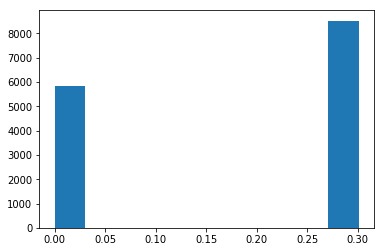

In [237]:
import matplotlib.pyplot as plt
plt.hist(idfs.values())
plt.show()

Answer for Part 6

(b) Create a Python dictionary where each token maps to the token's frequency times the token's IDF weight

In [220]:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [225]:
tfidf_google = computeTFIDF(tf_google, idfs)
tfidf_amazon = computeTFIDF(tf_amazon, idfs)

In [248]:
tfidf_google

{'pushes': 4.44403430369927e-06,
 'scooby': 0.0,
 'roy': 1.3332102911097811e-05,
 'optimum': 0.0,
 'batteries': 0.0,
 'articles': 0.0,
 'computerf': 0.0,
 'sloops': 4.44403430369927e-06,
 'crayons': 0.0,
 'mind': 0.0,
 'dxi': 4.44403430369927e-06,
 'bells': 0.0,
 'cruise': 0.0,
 'takeout': 0.0,
 'routines': 0.0,
 'sticks': 0.0,
 'gd': 4.44403430369927e-06,
 'fea': 4.44403430369927e-06,
 'porter': 0.0,
 'turnit': 4.44403430369927e-06,
 'dagobah': 0.0,
 'professionally': 0.0,
 'sided': 0.0,
 'editorially': 0.0,
 'scratching': 4.44403430369927e-06,
 'follow': 0.0,
 'bowling': 0.0,
 'degrees': 0.0,
 'summarize': 0.0,
 'provides': 0.0,
 'mla': 0.0,
 'redraws': 0.0,
 'figure': 0.0,
 'auxiliary': 0.0,
 'hijackers': 0.0,
 'diagramming': 0.0,
 'outshines': 0.0,
 'duo': 0.0,
 'dietary': 0.0,
 'platinumverb': 0.0,
 'invention': 0.0,
 'conflict': 0.0,
 'strikes': 0.0,
 'composing': 0.0,
 'moment': 0.0,
 'hobby': 8.88806860739854e-06,
 'several': 0.0,
 'cutaway': 0.0,
 'abe': 4.44403430369927e-06,


In [250]:
tfidf_amazon

{'pushes': 0.0,
 'scooby': 0.0,
 'roy': 0.0,
 'optimum': 0.0,
 'batteries': 1.6275498659918208e-06,
 'articles': 0.0,
 'computerf': 1.6275498659918208e-06,
 'sloops': 0.0,
 'crayons': 3.2550997319836415e-06,
 'mind': 0.0,
 'dxi': 0.0,
 'bells': 1.6275498659918208e-06,
 'cruise': 3.2550997319836415e-06,
 'takeout': 1.6275498659918208e-06,
 'routines': 3.2550997319836415e-06,
 'sticks': 3.2550997319836415e-06,
 'gd': 0.0,
 'fea': 0.0,
 'porter': 3.2550997319836415e-06,
 'turnit': 0.0,
 'dagobah': 1.6275498659918208e-06,
 'professionally': 0.0,
 'sided': 3.2550997319836415e-06,
 'editorially': 1.6275498659918208e-06,
 'scratching': 0.0,
 'follow': 0.0,
 'bowling': 0.0,
 'degrees': 8.137749329959105e-06,
 'summarize': 0.0,
 'provides': 0.0,
 'mla': 1.6275498659918208e-06,
 'redraws': 1.6275498659918208e-06,
 'figure': 0.0,
 'auxiliary': 3.2550997319836415e-06,
 'hijackers': 0.0,
 'diagramming': 6.510199463967283e-06,
 'outshines': 1.6275498659918208e-06,
 'duo': 0.0,
 'dietary': 3.25509973

In [226]:
import pandas as pd
pd.DataFrame([tfidf_google, tfidf_amazon])

,aa,aac,aaf,aang,aba,abacus,abandoned,abbreviated,abbyy,abc,...,zoom,zoombinis,zoomed,zoomify,zooming,zoomingcheck,zooms,zoopedia,zoos,zune
0,0.000027,0.000000,0.000000,0.000004,0.000009,0.0,0.000004,0.000000,0.000004,0.0,...,0.0,0.0,0.000004,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000016,0.000021,0.000000,0.000000,0.0,0.000000,0.000002,0.000000,0.0,...,0.0,0.0,0.000000,0.000033,0.000005,0.000002,0.0,0.000002,0.000002,0.000003


In [152]:
sc.stop()